# pytorch workflow

In [3]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [4]:
# data-> numerical encoding-> learns representation (pattern features weights) -> output

## linear regression

In [10]:
# create known parameters
weight=0.7
bias=0.3

# create dataset
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X +bias

# X,y

In [24]:
tensor = torch.tensor([1, 2, 3, 4, 5])
tensor2= torch.arange(1,6,1).unsqueeze(dim=1)

In [25]:
print(tensor.shape,tensor2.shape)
print(tensor.size(),tensor2.size())
print(tensor)
print(tensor2)
print(tensor2*10)

torch.Size([5]) torch.Size([5, 1])
torch.Size([5]) torch.Size([5, 1])
tensor([1, 2, 3, 4, 5])
tensor([[1],
        [2],
        [3],
        [4],
        [5]])
tensor([[10],
        [20],
        [30],
        [40],
        [50]])


In [26]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)# create train/test split

(40, 40, 10, 10)

In [27]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


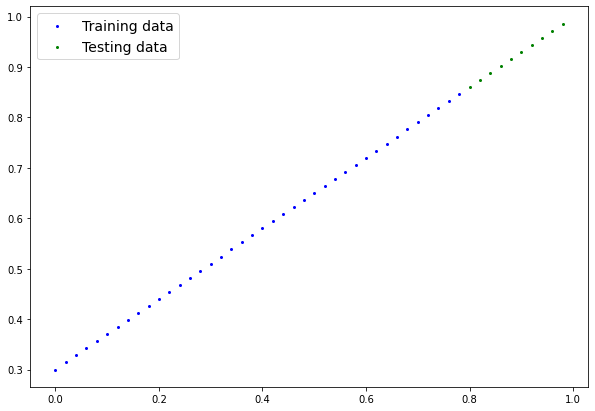

In [28]:
plot_predictions();

### first pytorch model

In [46]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float))
        
    def forward(self,x:torch.Tensor)->torch.Tensor: # <--"x" is the input
        return self.weights*x +self.bias

In [30]:
## check inside of the model

In [47]:
# create random seed
torch.manual_seed(42)

# create ad instance of the model 
model_0=LinearRegressionModel()

In [48]:
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [49]:
#### making prediction using 'torch.inference_mode() does not keep track of gradient-> much faster'
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds



tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

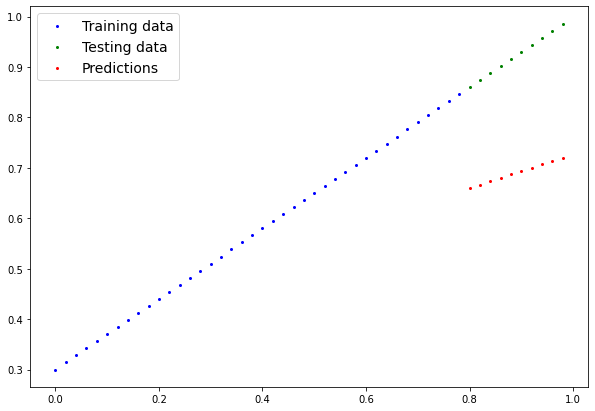

In [50]:
plot_predictions(predictions=y_preds);

In [54]:
loss_fn=nn.L1Loss()
    
    
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)# learning rate improtant hyperparameter    


In [73]:
# An epoch is one loop through the data... (this is a hyperparameter because we have set it)

epochs=1

# 0 loop through the data
for epoch in range(epochs):
    
    # set the model to trining mode
    
    model_0.train() # train mode in pytorch
    
    
    # 1. Forward pass
    y_pred=model_0(X_train)
    # 2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    print(f"loss {loss}")
    print(f"parameters values \n {model_0.state_dict()}")
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    
    optimizer.step()
    
    
    
    model_0.eval() # turn off fradient tracking


loss 0.06808149069547653
parameters values 
 OrderedDict([('weights', tensor([0.3647])), ('bias', tensor([0.4139]))])


parameters values 
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])


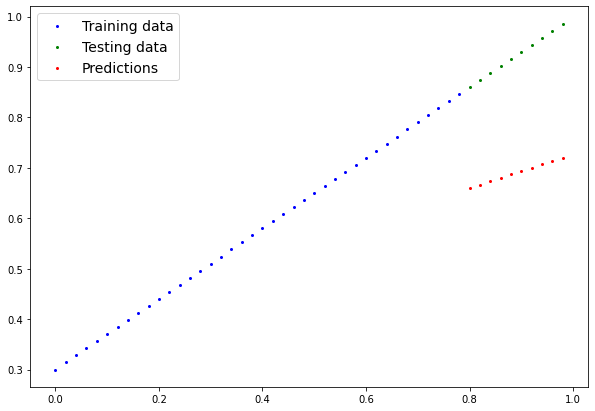

In [74]:
with torch.inference_mode():
    y_preds_new=model_0(X_test)

 
print(f"parameters values \n{model_0.state_dict()}")
    
plot_predictions(predictions=y_preds)

parameters values 
 OrderedDict([('weights', tensor([0.3569])), ('bias', tensor([0.4089]))])


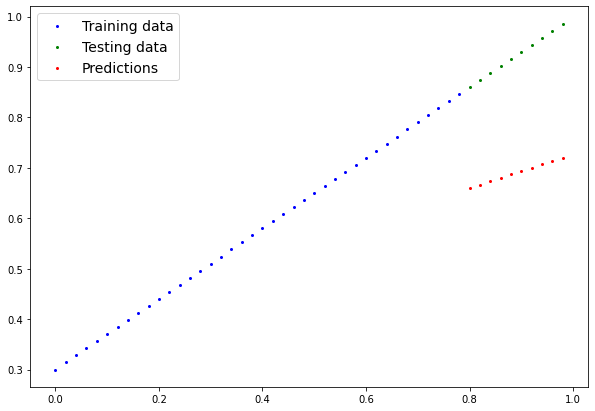